## Linear Regression with Python Scikit Learn
Python Scikit-Learn library was used for machine learning to implement regression functions. This is a demo with simple linear regression involving two variables.

Simple Linear Regression
The task is to predict the percentage of marks a student might score based on number of hours spent studying. Simple linear regression can be used for this task as it is exploring the relationship between two variables.

In [22]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Step1a Read the data

In [23]:
df = pd.read_csv("http://bit.ly/w-data")

## Step1b Inspect data

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [25]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [26]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [27]:
df.shape

(25, 2)

## Step2 Visualise the data
The linear regression algorithm works well when the variables are having a linear realtionship. It is best to visualise and check if the linear realtionship exists before proceeding.

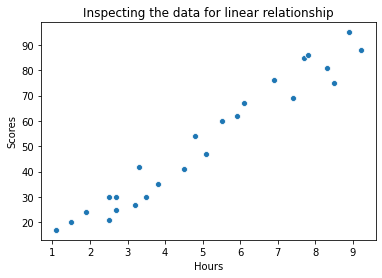

In [28]:
sns.scatterplot(data =df,x="Hours",y="Scores")
plt.title("Inspecting the data for linear relationship");

## Step3: Split the data

In [29]:
#Splitting the data into X(independent variable) and y(dependent variable)
X= df.Hours
y=df.Scores

In [30]:
#Splitting the data into test and train data 
#The ratio used here is 70:30
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.70,random_state=100)

In [31]:
#import the linear regression module for sklearn
from sklearn.linear_model import LinearRegression


##### create an instance of the Linear regression

In [32]:
#create an instance of the Linear regression
regressor = LinearRegression()

##### Reshape data since Linear regression module expects data in 2d form

In [33]:
X_train

6     9.2
12    4.5
4     3.5
24    7.8
0     2.5
1     5.1
20    2.7
14    1.1
17    1.9
18    6.1
2     3.2
10    7.7
16    2.5
15    8.9
7     5.5
3     8.5
8     8.3
Name: Hours, dtype: float64

In [34]:
X_train_with_constant = np.reshape(X_train.values,(-1,1))

## Step 3 Fit the model with the training data

In [35]:
#fit the data with the training data
regressor.fit(X_train_with_constant,y_train)

LinearRegression()

In [36]:
print("Coefficinet is : ",regressor.coef_)
print("Intercept is: ", regressor.intercept_)
coef = np.round(regressor.coef_,2)
intercept = np.round(regressor.intercept_,2)
print("Equation of line is Score = ",coef,"*Hours +",intercept)


Coefficinet is :  [9.87171443]
Intercept is:  1.4951421092364043
Equation of line is Score =  [9.87] *Hours + 1.5


## Step 4 Prediction

In [37]:
#Using the model to predict on training data
y_train_pred = regressor.predict(X_train_with_constant)

In [38]:
#Residue is the difference between the actual and the predicted
residue_train = y_train_pred-y_train

In [39]:
# a constant is added as is required by the model
X_test_with_constant = np.reshape(X_test.values,(-1,1))

In [40]:
#predicting on the test data
y_test_pred = regressor.predict(X_test_with_constant)

In [41]:
#finding the residue on the test data
residue = y_test_pred-y_test

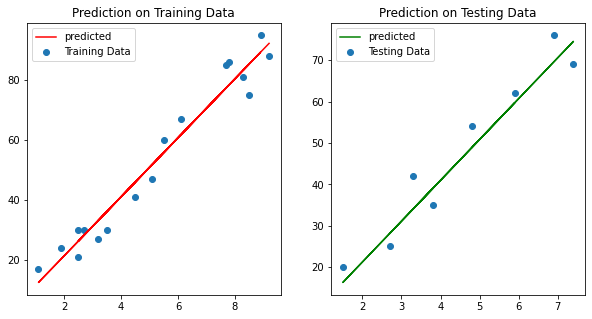

In [42]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(X_train,y_train,label="Training Data")
plt.plot(X_train,y_train_pred,'r',label="predicted")
plt.title("Prediction on Training Data")
plt.legend()
plt.subplot(1,2,2)
plt.title("Prediction on Testing Data")
plt.scatter(X_test,y_test,label="Testing Data")
plt.plot(X_test,y_test_pred,'g',label="predicted")
plt.legend();

## Evaluation

In [43]:
from sklearn.metrics import r2_score
r2_score_for_train = r2_score(y_true=y_train,y_pred=y_train_pred)
r2_score_for_test = r2_score(y_true=y_test,y_pred=y_test_pred)
diff = abs(r2_score_for_test-r2_score_for_train)
print("R2 score difference between test data and train data is ",round(diff*100,2))

R2 score difference between test data and train data is  2.61


##### Observation
Since the difference in r2 score is less than 5 percent it is a stable model.

### **Evaluating the model**

Finding the mean absolut error. This metric is used to comapre models when different models are used for the same problem.

In [45]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_test_pred)) 

Mean Absolute Error: 4.762517892332273


##### Looking at the RMSE
Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.

In [48]:
#Returns the mean squared error; we'll take a square root
np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

5.067387845160843